In [1]:
# Import necessary modules
import py_ncdiff
import os
import logging
import numpy as np

# Setup logging so info / debug -> stdout instead of stderr
py_ncdiff.init_logging()
logger = logging.getLogger(__name__)

In [4]:
baseline_case = 'C1850ECO.T62_g37.ciso.trunk_20180716'
new_case = 'C1850ECO.T62_g37.ciso.trunk_20180705'

root_dir = os.path.join(os.path.sep,'glade','scratch_new','mlevy')
if not os.path.isdir(root_dir):
    root_dir = os.path.join(os.path.sep,'sshfs') + root_dir

if os.path.isdir(os.path.join(root_dir,new_case)):
    file1 = os.path.join(root_dir,new_case,'run',new_case+'.pop.h.0001-01-03.nc')
    file2 = os.path.join(root_dir,'baselines','single_run',baseline_case+'.pop.h.0001-01-03.nc')
    nc_test = py_ncdiff.netCDF_comp_class(file1, file2,quiet=True,is_POP=True)
else:
    logger.error("Can not find root directory (may need to mount sshfs drive)")


Comparing /sshfs/glade/scratch_new/mlevy/C1850ECO.T62_g37.ciso.trunk_20180705/run/C1850ECO.T62_g37.ciso.trunk_20180705.pop.h.0001-01-03.nc and /sshfs/glade/scratch_new/mlevy/baselines/single_run/C1850ECO.T62_g37.ciso.trunk_20180716.pop.h.0001-01-03.nc
-----
Baseline modified: Thu Jul 19 11:43:37 2018
New file modified: Thu Jul 19 11:08:57 2018
-----


In [ ]:
nc_test.compare_variable_names()
nc_test.compare_variable_type_and_dims()
nc_test.compare_metadata()
nc_test.compare_values()
# nc_test.diff_vars
err_cnt = nc_test.parse_results()

In [5]:
%pylab inline
pylab.rcParams['figure.figsize'] = (18.0, 10.0); # Large figures

#import xarray as xr
#import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [14]:
nc_test.baseline['ds']['SSH']

<xarray.DataArray 'SSH' (time: 1, nlat: 116, nlon: 100)>
array([[[        nan,         nan, ...,         nan,         nan],
        [-129.797841,         nan, ..., -131.980806, -130.417997],
        ...,
        [        nan,         nan, ...,         nan,         nan],
        [        nan,         nan, ...,         nan,         nan]]])
Coordinates:
  * time     (time) float64 368.0
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Sea Surface Height
    units:         centimeter
    coordinates:   TLONG TLAT time
    grid_loc:      2110
    cell_methods:  time: mean

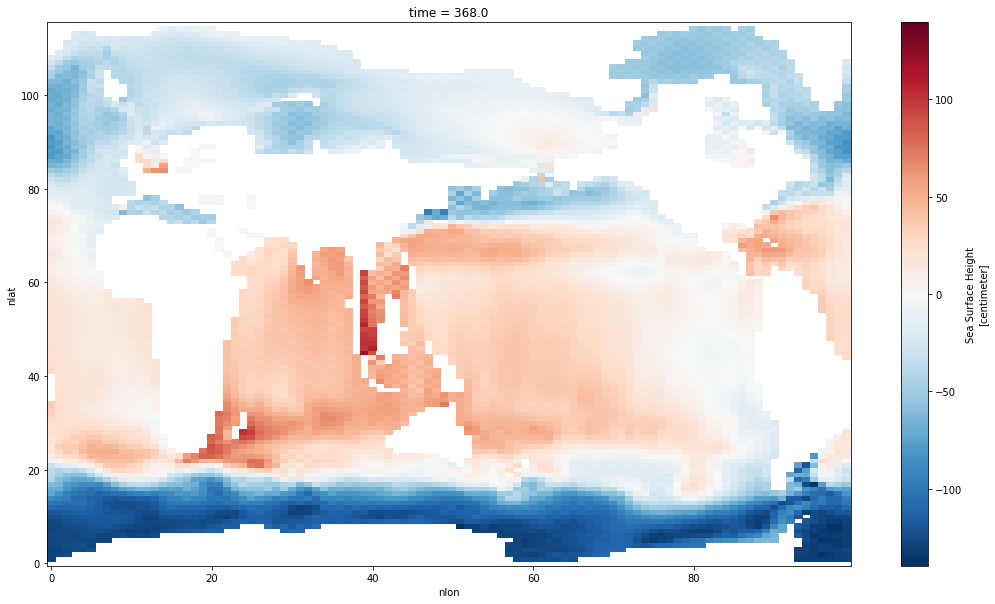

In [15]:
var_to_plot = 'SSH'
kwargs = dict()
if 'z_t' in nc_test.baseline['ds'][var_to_plot].coordinates:
    kwargs['z_t']=0

var_baseline = nc_test.baseline['ds'][var_to_plot]
# var_new_file = nc_test.new_file['ds'][var_to_plot]
# var_difference = nc_var_baseline - var_new_file
var_baseline.isel(**kwargs).plot()
#var_new_file.isel(z_t=0).plot()
#var_difference.isel(z_t=0).plot()